# 1- L'importation des données :

Dans un premier temps on importe les bibliothèques dont on aura besoin :

In [6]:
import os
from fnmatch import fnmatch
import pandas as pdimport matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

On utilise la bibliothèque pandas pour récupérer les données à partir d'un fichier csv qu'on le met soit dans le meme dossier que notre notebook ou on initialise la fonction read_csv() par le chemin dont on a notre fichier.

In [8]:

df_Energy=pd.read_csv(r'C:\Users\dell\Downloads\energydata_complete\energydata_complete.csv')
df_Energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


Ici on veut vérifier s'il y a des valeurs manquantes.

In [9]:
df_Energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [10]:
df_Energy.shape

(19735, 29)

On décrit note dataset en calculant les valeurs visualisées sur le tableau suivant :

In [11]:
df_Energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# 2- Correlation plot

On utilise le diagramme de corrélation pour sélectionner les meilleures caractéristiques pour le modèle.

Text(0.5, 1.0, 'Heatmap of Variables')

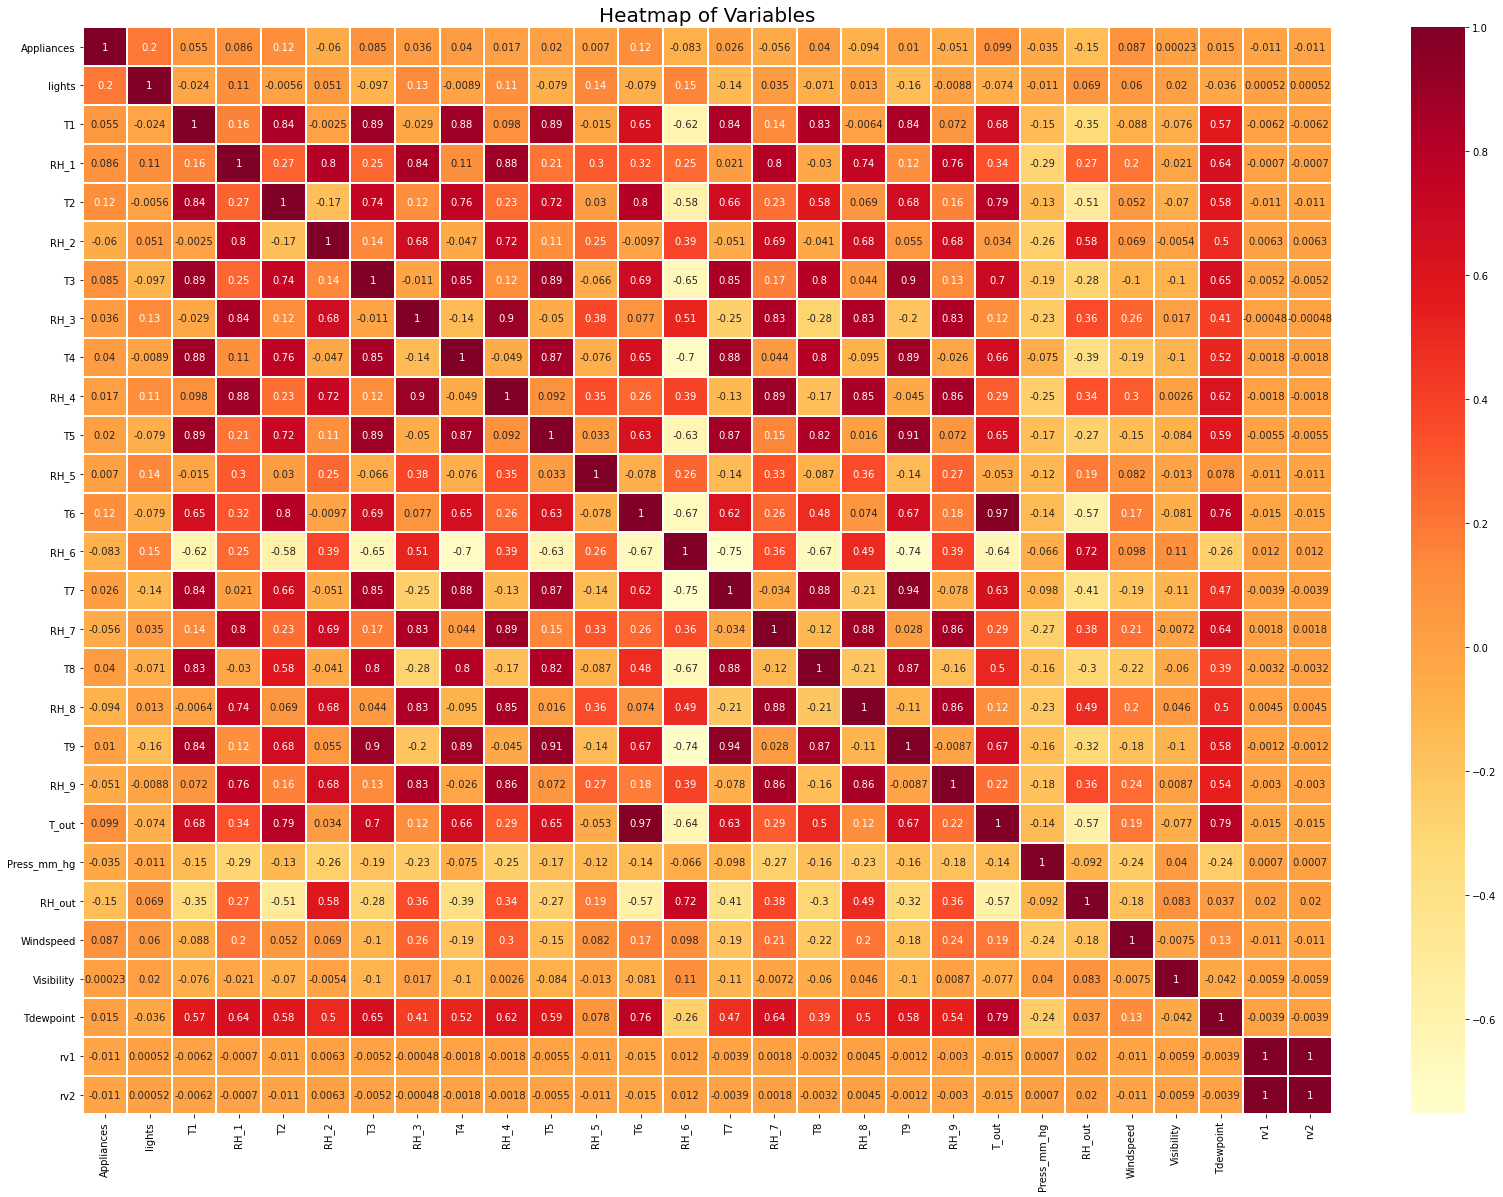

In [12]:
#Correlation:

fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_Energy.corr(), cmap= 'YlOrRd', linewidth=1, linecolor='white', annot=True)
axis.set_title('Heatmap of Variables', fontsize=20)

# 3- Feature selection :

Pour la sélection des fonctionnalités, nous mettons en œuvre l'élimination à l'aide d'une corrélation soutenue par l'intuition métier.

The number of the 0,1% top values of appliances' load is 19 and they have power load higher than 140 Wh.


Text(0.5, 1.0, 'Appliances energy consumption distribution')

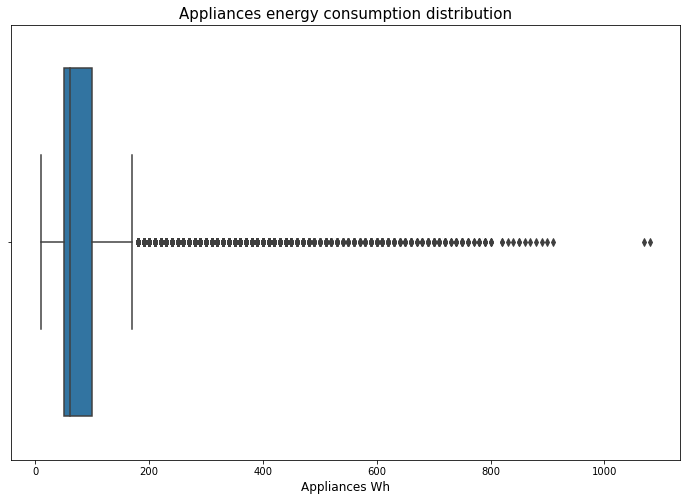

In [13]:
# Find outliers
sorted_appliances = df_Energy.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")

# boxplot appliances
plt.figure(figsize=(12,8))
sns.boxplot(x="Appliances", data=df_Energy)
plt.xlabel('Appliances Wh', fontsize=12)
plt.title("Appliances energy consumption distribution", fontsize=15)

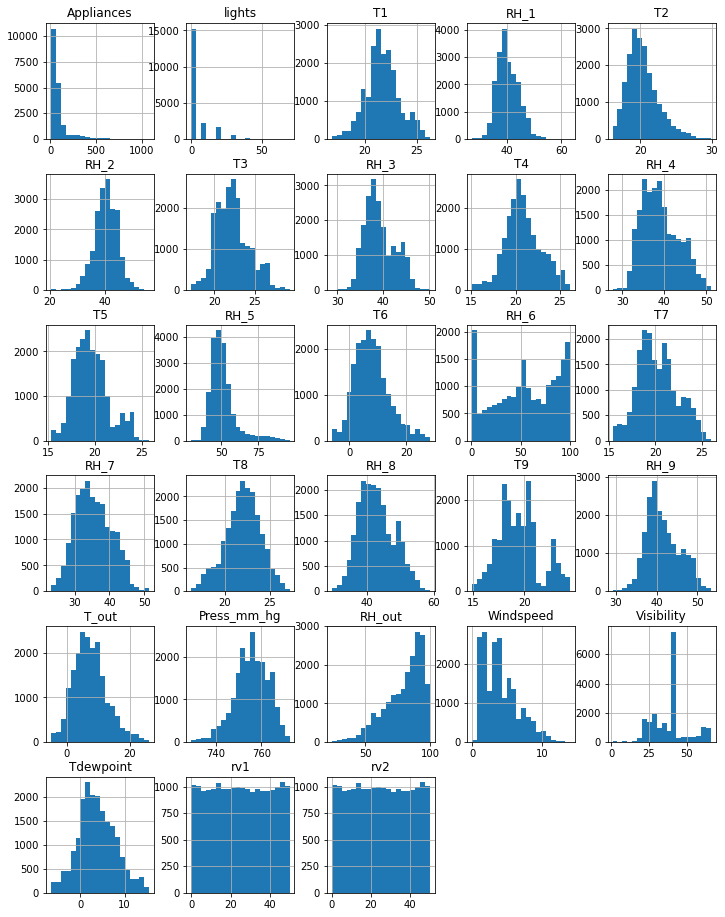

In [14]:
# Histogram of all the features to understand the distribution
df_Energy.hist(bins = 20 , figsize= (12,16)) ;

In [15]:
df_Energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [16]:
df_final = df_Energy[['T1', 
                     'T2', 
                     'RH_1', 
                     'RH_2',
                     'RH_6', 
                     'T_out',
                     'lights',
                     'Windspeed',
                     'RH_out', 
                     'Appliances',
                     'Press_mm_hg',
                     'rv1',
                     'Tdewpoint']]

df_final['Appliances_Energy'] = np.where(df_final['Appliances']>= 60, 1, 0)
df_final.drop(columns=['Appliances'],axis=1,inplace=True)

In [17]:
df_final.head()

,T1,T2,RH_1,RH_2,RH_6,T_out,lights,Windspeed,RH_out,Press_mm_hg,rv1,Tdewpoint,Appliances_Energy
0,19.89,19.2,47.596667,44.790000,84.256667,6.600000,30,7.000000,92.0,733.5,13.275433,5.3,1
1,19.89,19.2,46.693333,44.722500,84.063333,6.483333,30,6.666667,92.0,733.6,18.606195,5.2,1
2,19.89,19.2,46.300000,44.626667,83.156667,6.366667,30,6.333333,92.0,733.7,28.642668,5.1,0
3,19.89,19.2,46.066667,44.590000,83.423333,6.250000,40,6.000000,92.0,733.8,45.410389,5.0,0
4,19.89,19.2,46.333333,44.530000,84.893333,6.133333,40,5.666667,92.0,733.9,10.084097,4.9,1


# 4- L'algorithme adopté :

Dans l'apprentissage automatique , le noyau de fonction de base radiale , ou noyau RBF , est une fonction de noyau populaire utilisée dans divers algorithmes d'apprentissage noyaux. En particulier, il est couramment utilisé dans la classification des machines à vecteurs de support .

Ici on a choisi de travailler avec les machines à vecteurs de support, ou support vector machine (SVM), qui sont des modèles de machine learning supervisés centrés sur la résolution de problèmes de discrimination et de régression mathématiques.

Voici notre carte des chaleurs finale variables que nous allons utiliser avec le modèle [SVM, Decision Tress and Boosting].

Text(0.5, 1.0, 'Heatmap of Variables')

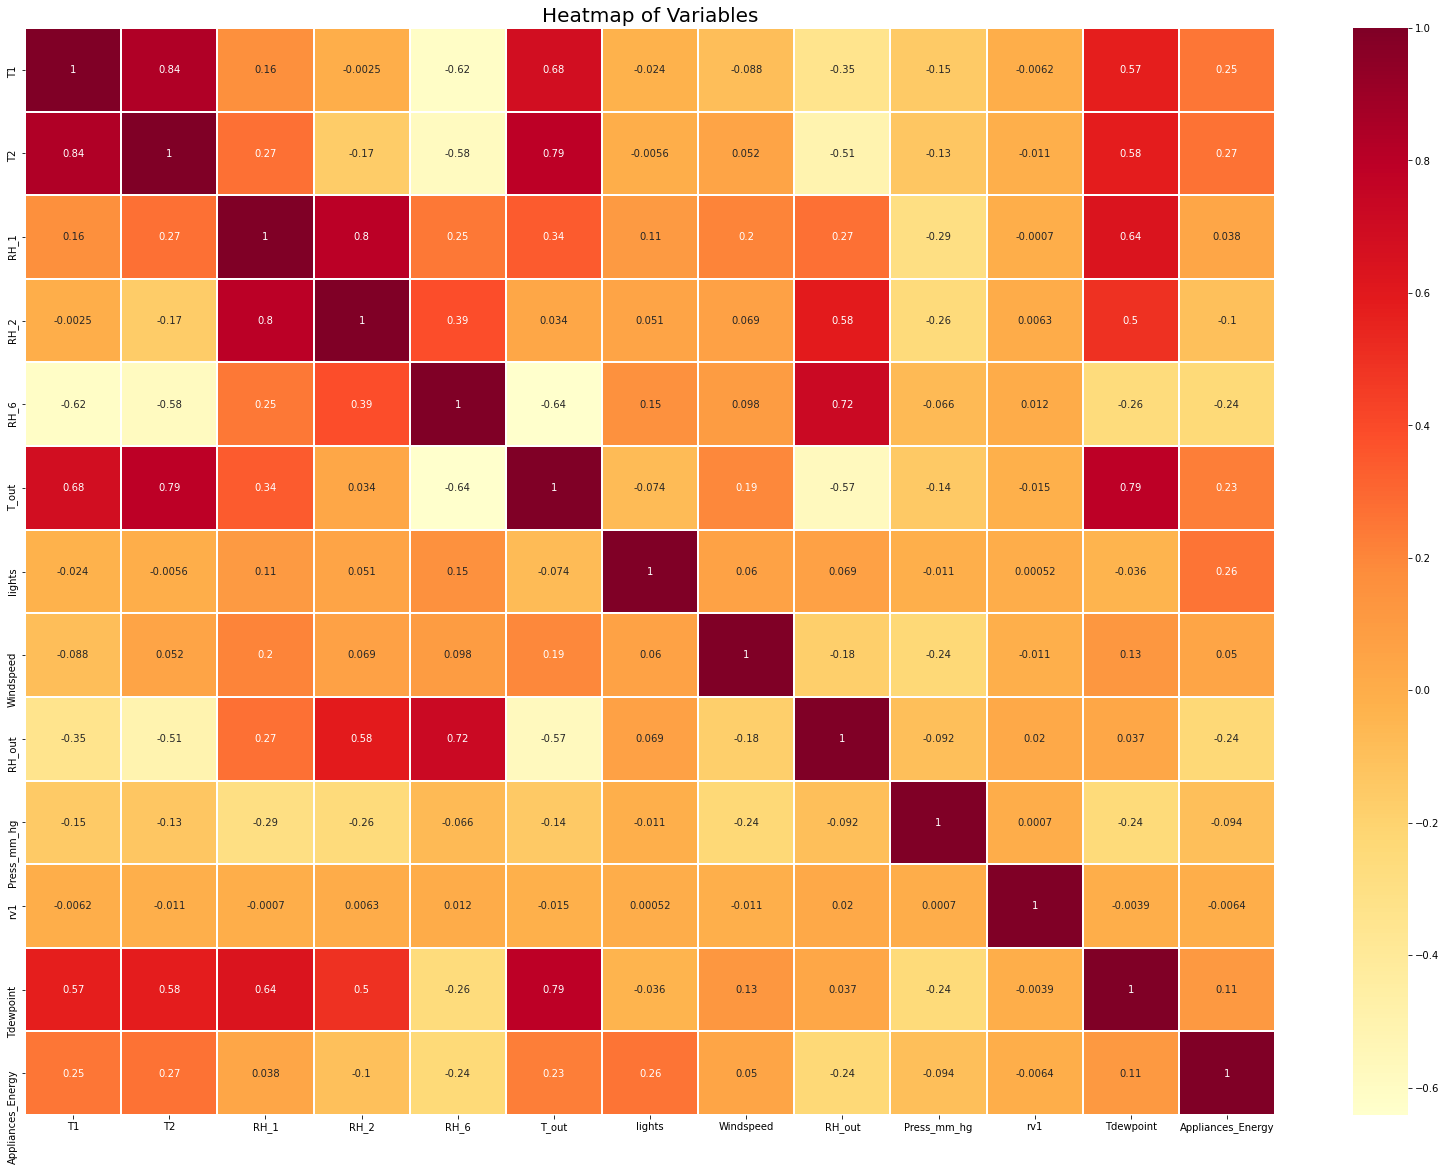

In [18]:
fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_final.corr(), cmap= 'YlOrRd', linewidth=1, linecolor='white', annot=True)
axis.set_title('Heatmap of Variables', fontsize=20)

# 5- Train Test Split :

On divise les données comme suit : 70% pour l'entrainement et on laisse 30% pour le test.

In [19]:
x = df_final.drop(columns=['Appliances_Energy'],axis=1)

y = df_final[['Appliances_Energy']]

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [20]:
print('Shape of xTrain Set', xTrain.shape)
print('Shape of yTrain Set', yTrain.shape)

print('')

print('Shape of xTest Set', xTest.shape)
print('Shape of yTest Set', yTest.shape)

Shape of xTrain Set (13814, 12)
Shape of yTrain Set (13814, 1)

Shape of xTest Set (5921, 12)
Shape of yTest Set (5921, 1)


# 6- Cross-Validation Split :

La  technique  dite  "k-fold  cross-validation",  permet  de  diviser  la  base  des  exemples  d’apprentissage  en  k  échantillons.  Dans  le  cas  simple  les  échantillons  de  même  taille.  k-1  groupements  sont  utilisés  et  le  dernier  groupe  pour  l’évaluation.  Cette  procédure  est  répétée  pour  tous  les  autres  groupes,  la  performance est la moyenne des k scores.

In [21]:
cv=KFold(n_splits=10)

for train_index, test_index in cv.split(x):
    xTrain_cv,xTest_cv=x.iloc[train_index],x.iloc[test_index]
    yTrain_cv,yTest_cv=y.iloc[train_index],y.iloc[test_index]
    
print('Shape of xTrain Set', xTrain_cv.shape)
print('Shape of yTrain Set', yTrain_cv.shape)

print('')

print('Shape of xTest Set', xTest_cv.shape)
print('Shape of yTest Set', yTest_cv.shape)

Shape of xTrain Set (17762, 12)
Shape of yTrain Set (17762, 1)

Shape of xTest Set (1973, 12)
Shape of yTest Set (1973, 1)


Jetons un coup d'œil au décompte des classes pour vérifier la balance :

<AxesSubplot:xlabel='Appliances_Energy', ylabel='count'>

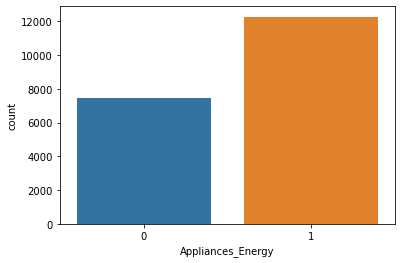

In [22]:
sns.countplot(df_final['Appliances_Energy'])

# 7- SVM :

Ici on veut créer une fonction pour prendre le noyau en entrée et exécuter le modèle et fournir des métriques pour tout type de SVM.

On va effectuer une comparaison entre les différents noyaux :
1- Linéaire.
2- RBF : qui est demandé dans cette application.
3- Sigmoid.

Et on va afficher par la suite des résultats pour le train-test split et le cross-validation pour chaque kernel des kernels suivants.

In [23]:
def runModelSVM(k,xTrain,yTrain,xTest,yTest):
    from sklearn.svm import SVC
    
    svc_clf = SVC(kernel=k)
    svc_clf.fit(xTrain,yTrain)
    y_pred=svc_clf.predict(xTest)

    print(' Kernel: ',k)
    print('Train score: {:.4f} %'.format(svc_clf.score(xTrain, yTrain)*100))
    print('Test score: {:.4f} %'.format(svc_clf.score(xTest, yTest)*100))
    print('')
    print('Classification Report:')
    print(classification_report(yTest,y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(yTest,y_pred))

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(xTrain, yTrain)

# Predicting the Test set results
y_pred = classifier.predict(xTest)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest, y_pred)


RBF Kernel

In [25]:
print('********************** Result for Train-Test Split **********************\n')
runModelSVM('rbf',xTrain,yTrain,xTest,yTest)
print('********************** Result for Cross-Validation **********************\n')
runModelSVM('rbf',xTrain_cv,yTrain_cv,xTest_cv,yTest_cv)

********************** Result for Train-Test Split **********************

 Kernel:  rbf
Train score: 67.9238 %
Test score: 68.1135 %

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.30      0.41      2192
           1       0.69      0.91      0.78      3729

    accuracy                           0.68      5921
   macro avg       0.67      0.60      0.59      5921
weighted avg       0.67      0.68      0.64      5921

Confusion Matrix:
[[ 651 1541]
 [ 347 3382]]
********************** Result for Cross-Validation **********************

 Kernel:  rbf
Train score: 67.8921 %
Test score: 73.2894 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.73      1.00      0.85      1446

    accuracy                           0.73      1973
   macro avg       0.37      0.50      0.42      1973
weighted avg       0.54      0.73      0

# Autre solution :

Une autre approche pour résoudre ce problème concerne l'utilisation de l'algorithme de Kmeans et un kernel basé sur le RBF.

In [26]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn import datasets


Ici on vient de définir la fonction RBF qui calcule les distances, et la fonction Kmeans qui implémente l'algrothme et qui prend en paramètre le kernel de RBF.

In [27]:
nbreClasses = 2
def rbf(x, c, s):
    distance=np.linalg.norm(np.array(x)-np.array(c))
    return 1/np.exp(-distance/(2*s**2))
    
def kmeans(X, k, itersmax=100): 
    
    clusters=X[np.random.choice(range(len(X)), k, replace=False)]
    converged=False
    
    iter=0
    while(not converged)and(iter<itersmax):  
        
        cluster_list=[[]for i in range(len(clusters))]
        for x in X:
            distances=[]
            for c in clusters:
                distances.append(np.linalg.norm(np.array(x)-np.array(c)))
            cluster_list[int(np.argmin(distances))].append(x)
            
        cluster_list=list((filter(None, cluster_list)))
        
        prevClusters=clusters.copy()
        clusters=[]
        
        for j in range(len(cluster_list)):
            clusters.append(np.mean(cluster_list[j], axis=0))
            
        diff=np.abs(np.sum(prevClusters)-np.sum(clusters))
        print('Test KMEANS :', diff)
        converged=(diff==0)
        
        iter+=1
        
    stds=[np.std(x) for x in cluster_list]
    return np.array(clusters), stds
        

        
    
    

# RBFNet :

On va clairement l'implémentation de la classe RBFNet, dont on définit 4 méthodes __init__() pour l'initialisation, rbf states, fit et predict pour la prédiction.

In [28]:
class RBFNet(object):
    
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, withstds=True):
        self.k=k
        self.lr=lr
        self.epochs=epochs
        self.rbf=rbf
        self.withstds=withstds
        
        self.w=np.random.randn(nbreClasses,self.k)
        self.b=np.random.randn(nbreClasses)
        
    def rbf_states(self, X, clusters, stds):
        rbfs=[]
        for x in X:
            rbfs.append([rbf(x, c, s)for(c, s)in zip(clusters, stds)])
        return np.array(rbfs)
    
    def fit(self, X, y):
        self.centers,self.stds=kmeans(X,self.k, itersmax=100)
        
        if not self.withstds:
            dMax=np.max([np.linalg.norm(np.array(c1)-np.array(c2)) for c1 in self.centers for c2 in self.centers])
            self.stds=np.repeat(dMax/np.sqrt(2*self.k),self.k)
        
        epochsDisp=self.epochs//10
        
        for epoch in range(self.epochs):
            globalLoss=0;
            for i in range(X.shape[0]):
                a=np.array([rbf(X[i], c, s) for c, s in zip(self.centers,self.stds)])
                F=self.w.dot(a.T)+self.b
                loss=(y[i]-F)**2
                globalLoss=globalLoss+np.linalg.norm(loss)
                error=-(y[i]-F).flatten()
                self.w=self.w-self.lr*error.reshape(nbreClasses,1).dot(a.reshape(1,self.k))
                self.b=self.b-self.lr*error
                
            if epoch%epochsDisp== 0 :
                print(str(epoch),'RBF training : mean error :{0:.2f}'.format(globalLoss/X.shape[0]))
                
    def predict(self, X):
         y_pred=[]
         for i in range(X.shape[0]):
            a=np.array([rbf(X[i], c, s)for c, s in zip(self.centers,self.stds)])
            F=self.w.dot(a.T)+self.b
            y_pred.append(F)
         return np.array(y_pred)
            

Ici on exploite l'algorithme Kmeans qui utilise le kernel RBF sur les données de consommation d'énergie qu'on a déjà préparé :

In [29]:
rbfnet=RBFNet(lr=0.01, k=30, epochs=200, withstds='true')

n12 = np.squeeze(np.asarray(xTrain))
n13 = np.squeeze(np.asarray(yTrain))

    
rbfnet.fit(n12, n13)

Test KMEANS : 37.416936483816244
Test KMEANS : 62.712222565489355
Test KMEANS : 46.41127485659672
Test KMEANS : 29.35762945712122
Test KMEANS : 21.34815248767336
Test KMEANS : 18.23339382783888
Test KMEANS : 13.602479979686905
Test KMEANS : 10.940256924717687
Test KMEANS : 7.522439079468313
Test KMEANS : 8.392890416886075
Test KMEANS : 6.869426549626951
Test KMEANS : 5.7659830109842005
Test KMEANS : 3.996438441470673
Test KMEANS : 1.6831525756751944
Test KMEANS : 4.2883574643674365
Test KMEANS : 3.6279561896808445
Test KMEANS : 5.204078792998189
Test KMEANS : 4.170980728624272
Test KMEANS : 3.5148762638382323
Test KMEANS : 3.382866385483794
Test KMEANS : 4.158168515270518
Test KMEANS : 4.261239633069636
Test KMEANS : 5.590872603945172
Test KMEANS : 6.22719692044484
Test KMEANS : 5.381575054165296
Test KMEANS : 5.83279419585233
Test KMEANS : 2.878143494890537
Test KMEANS : 3.2394397470088734
Test KMEANS : 2.6569644863739086
Test KMEANS : 1.2561399798141792
Test KMEANS : 2.50740635681722

In [30]:
n14 = np.squeeze(np.asarray(xTest))
predictions=rbfnet.predict(n14)

Après avoir prédire l'approximation énergitique après l'apprentissage, les résultats de l'apprentissage et du test sont les suivants :

In [31]:
n15= np.squeeze(np.asarray(yTest))
print('Evaluation :')
print('Exemples Test :',n14.shape)

print('----------------------------------- :')
print('--------------------   Prediction   ------------------')
print(predictions.argmax(axis=1))
print(' ')
print('--------------------   true   ------------------')
print(n15)

print(classification_report(n15, predictions.argmax(axis=1)))

Evaluation :
Exemples Test : (5921, 12)
----------------------------------- :
--------------------   Prediction   ------------------
[0 0 0 ... 1 1 0]
 
--------------------   true   ------------------
[1 0 1 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.29      0.42      0.34      2192
           1       0.54      0.40      0.45      3729

    accuracy                           0.40      5921
   macro avg       0.41      0.41      0.40      5921
weighted avg       0.44      0.40      0.41      5921

